In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('diabetes.csv')
# Afficher les informations du dataframe : types, valeurs non-nulles, etc.
# print(df.info())
# Afficher les 5 premières lignes pour aperçu des données
# print(df.head())
# 2. Valeurs manquantes
# print("\nNombre de valeurs manquantes par colonne :")
# print(df.isnull().sum())
# 3. Doublons
# print("\nNombre de doublons :", df.duplicated().sum())
# 4. Statistiques descriptives des variables numériques
print("\nRésumé statistique :")
print(df.describe())


Résumé statistique :
       Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean   383.500000     3.845052  120.894531      69.105469      20.536458   
std    221.846794     3.369578   31.972618      19.355807      15.952218   
min      0.000000     0.000000    0.000000       0.000000       0.000000   
25%    191.750000     1.000000   99.000000      62.000000       0.000000   
50%    383.500000     3.000000  117.000000      72.000000      23.000000   
75%    575.250000     6.000000  140.250000      80.000000      32.000000   
max    767.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  768.000000  
mean    79.799479   31.992578                  0.471876   33.240885  
std    115.244002    7.884160                  0.331329   11.760232  
min      0.00

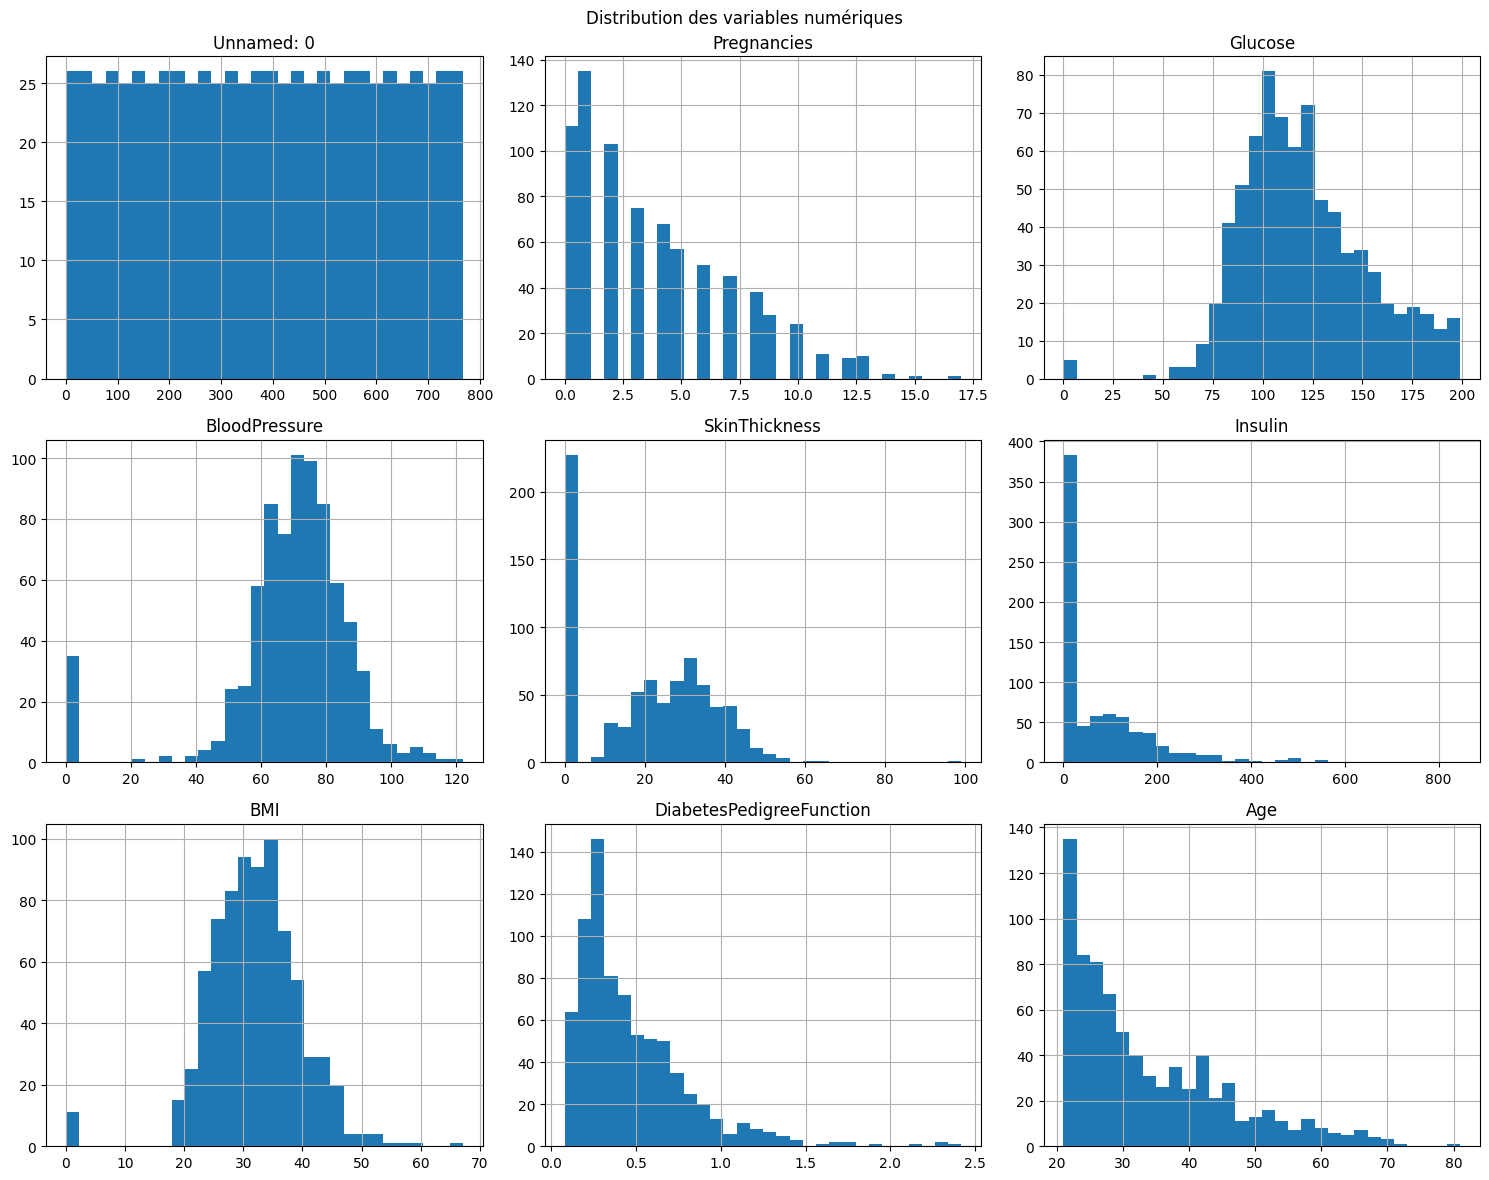

In [73]:
# 5. Analyse distribution des variables numériques
df.hist(figsize=(15, 12), bins=30)
plt.suptitle("Distribution des variables numériques")
plt.tight_layout()
plt.show()


Matrice de corrélation :
                          Unnamed: 0  Pregnancies   Glucose  BloodPressure  \
Unnamed: 0                  1.000000    -0.037201  0.012994       0.020953   
Pregnancies                -0.037201     1.000000  0.129459       0.141282   
Glucose                     0.012994     0.129459  1.000000       0.152590   
BloodPressure               0.020953     0.141282  0.152590       1.000000   
SkinThickness               0.019006    -0.081672  0.057328       0.207371   
Insulin                     0.001998    -0.073535  0.331357       0.088933   
BMI                         0.012320     0.017683  0.221071       0.281805   
DiabetesPedigreeFunction   -0.040326    -0.033523  0.137337       0.041265   
Age                         0.007714     0.544341  0.263514       0.239528   

                          SkinThickness   Insulin       BMI  \
Unnamed: 0                     0.019006  0.001998  0.012320   
Pregnancies                   -0.081672 -0.073535  0.017683   
Gluc

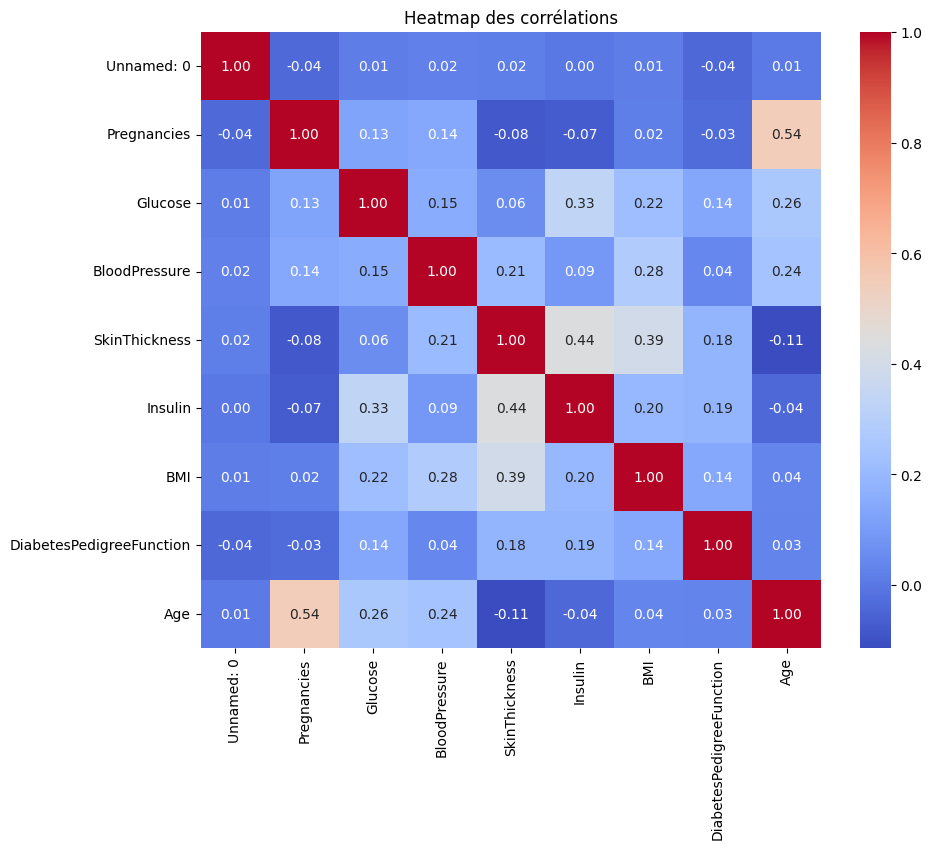

In [74]:
# 6. Matrice de corrélation
corr = df.corr()
print("\nMatrice de corrélation :")
print(corr)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap des corrélations")
plt.show()


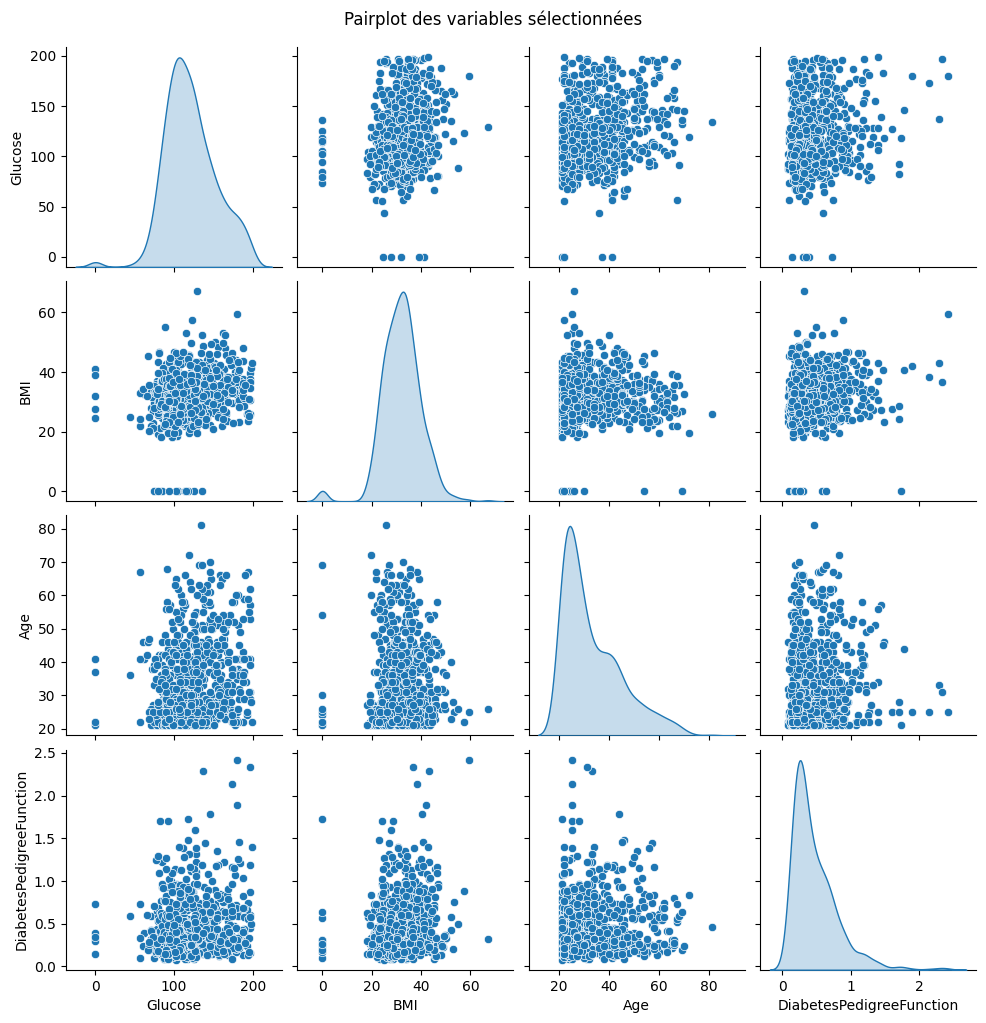

In [75]:
# 7. Visualisation relations entre variables (pairplot)
# On limite les variables pour pairplot pour ne pas alourdir (cf prochaine étape sur sélection)
selected_vars = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
sns.pairplot(df[selected_vars], diag_kind='kde')
plt.suptitle("Pairplot des variables sélectionnées", y=1.02)
plt.show()

In [76]:
# Gestion des valeurs manquantes
print("\nNombre de valeurs manquantes par colonne :")
print(df.isnull().sum())

# Exemple de traitement : remplacer les valeurs manquantes par la médiane de chaque colonne
df.fillna(df.median(), inplace=True)

# Vérification après traitement
print("\nValeurs manquantes après traitement :")
print(df.isnull().sum())


Nombre de valeurs manquantes par colonne :
Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

Valeurs manquantes après traitement :
Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [77]:
# Détection et suppression des valeurs aberrantes (outliers) avec l'IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Liste des colonnes numériques à traiter
num_cols = df.select_dtypes(include='number').columns.tolist()

# Suppression des outliers
df = remove_outliers_iqr(df, num_cols)

# Vérification
print("\nNombre de lignes après suppression des outliers :", len(df))


Nombre de lignes après suppression des outliers : 636


In [78]:
# Sélection des variables pertinentes pour le clustering
selected_vars = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
X = df[selected_vars]
print(X.head())

   Glucose   BMI  Age  DiabetesPedigreeFunction
0      148  33.6   50                     0.627
1       85  26.6   31                     0.351
2      183  23.3   32                     0.672
3       89  28.1   21                     0.167
5      116  25.6   30                     0.201


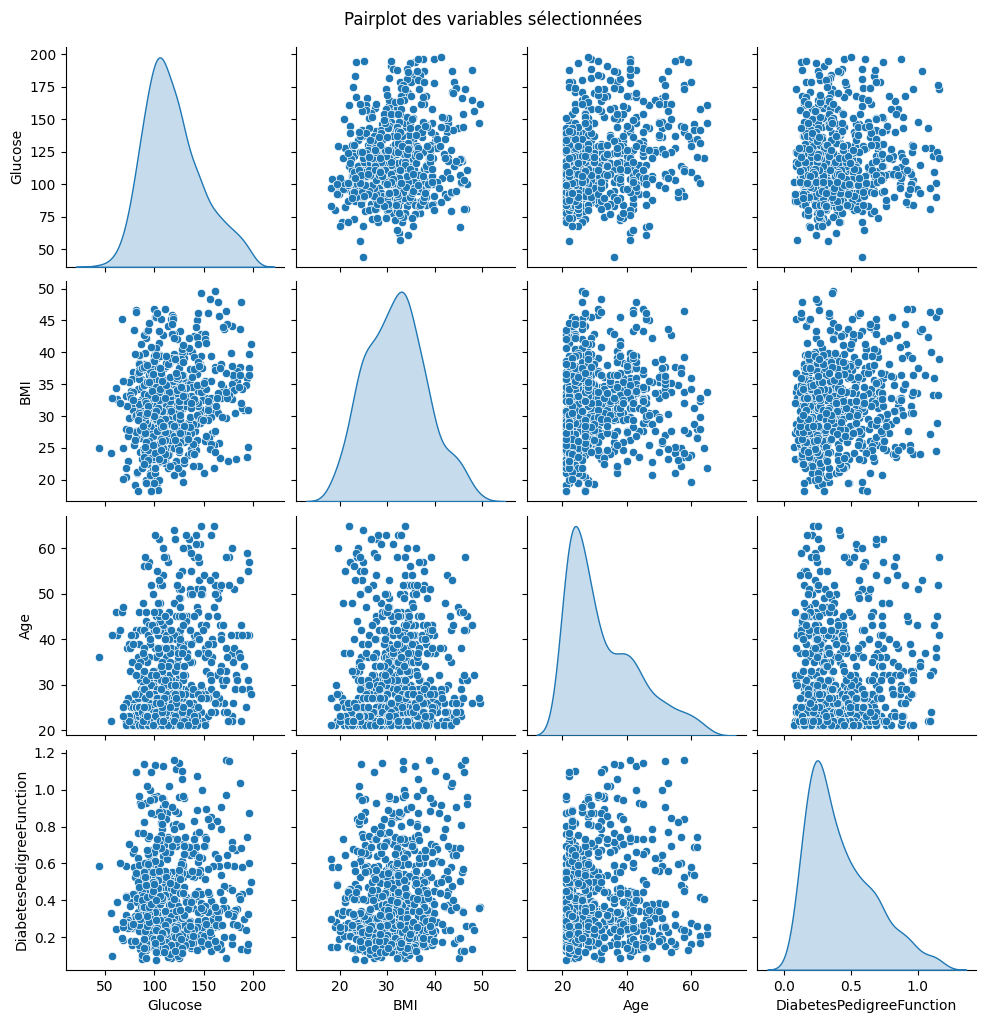

In [79]:
sns.pairplot(X, diag_kind='kde')
plt.suptitle("Pairplot des variables sélectionnées", y=1.02)
plt.show()

In [80]:
from sklearn.preprocessing import StandardScaler

# Standardisation des variables sélectionnées
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Conversion en DataFrame pour garder les noms de colonnes
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled.head())

    Glucose       BMI       Age  DiabetesPedigreeFunction
0  1.005403  0.256438  1.604688                  0.819791
1 -1.168963 -0.840893 -0.143041                 -0.307223
2  2.213384 -1.358207 -0.051055                  1.003543
3 -1.030908 -0.605751 -1.062898                 -1.058566
4 -0.099037 -0.997655 -0.235026                 -0.919731


In [81]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertia')
plt.title('Méthode du coude pour déterminer k optimal')
plt.show()

ImportError: cannot import name 'line_search_wolfe1' from 'sklearn.utils.fixes' (c:\Users\Saad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\fixes.py)

In [ ]:

# Supposons que le nombre optimal de clusters (k) est 2, à adapter selon votre coude
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_scaled)

# Ajout des labels de cluster au DataFrame
X['cluster'] = kmeans.labels_
print(X.head())

   Glucose   BMI  Age  DiabetesPedigreeFunction  cluster
0      148  33.6   50                     0.627        0
1       85  26.6   31                     0.351        1
2      183  23.3   32                     0.672        0
3       89  28.1   21                     0.167        1
5      116  25.6   30                     0.201        1


C:\Users\Saad\AppData\Local\Temp\ipykernel_8248\2701167371.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.labels_


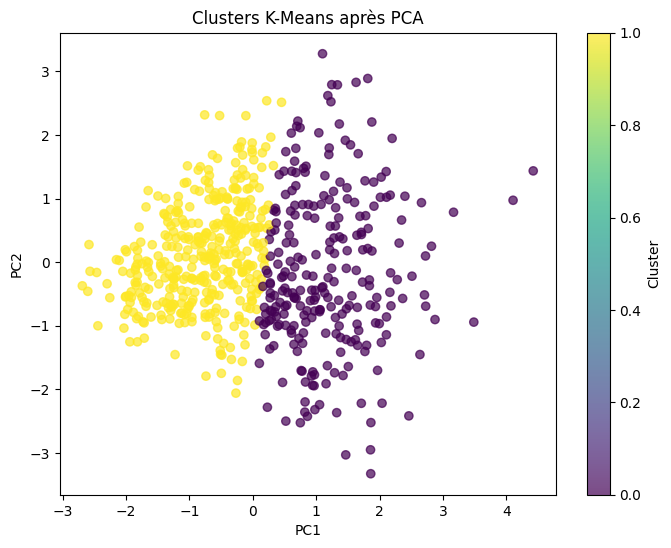

In [ ]:
from sklearn.decomposition import PCA

# Réduction de dimensionnalité à 2 axes avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Réentraîner le modèle K-Means sur les nouvelles dimensions
kmeans_pca = KMeans(n_clusters=k_optimal, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Visualisation des clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters K-Means après PCA')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Calcul des moyennes par cluster
print(X.groupby('cluster').mean())

# Nombre d'observations par cluster
print(X['cluster'].value_counts())

# Détection du cluster à haut risque
high_risk = X.groupby('cluster').mean().apply(
    lambda row: row['Glucose'] > 126 and row['BMI'] > 30 and row['DiabetesPedigreeFunction'] > 0.5, axis=1
)


            Glucose        BMI        Age  DiabetesPedigreeFunction
cluster                                                            
0        139.897233  34.935573  41.264822                  0.484130
1        104.979112  30.001305  26.801567                  0.387995
cluster
1    383
0    253
Name: count, dtype: int64


In [ ]:
# Nombre d'observations par cluster
# print(X['cluster'].value_counts())

# Ajout de la colonne risk_category (1 = risque élevé, 0 = faible)
X['risk_category'] = X['cluster'].apply(lambda c: "risque faible" if c == 1 else "risque élevé")

print(X[['cluster', 'risk_category']].head())

In [ ]:
# Définir la variable cible y à partir de la colonne cluster
y = X['cluster']
print(y.value_counts())

cluster
1    383
0    253
Name: count, dtype: int64


In [ ]:
# Définir X à partir des variables sélectionnées (hors cluster et risk_category)
X_features = X[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']]
print(X_features.head())

   Glucose   BMI  Age  DiabetesPedigreeFunction
0      148  33.6   50                     0.627
1       85  26.6   31                     0.351
2      183  23.3   32                     0.672
3       89  28.1   21                     0.167
5      116  25.6   30                     0.201


# Classification supervisée (basée sur les clusters)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Variable cible
y = X['cluster']

# Variables explicatives
X_features = X[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42, stratify=y)

# Sur-échantillonnage
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Entraînement de plusieurs modèles de classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Entraînement des modèles
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42)

rf.fit(X_train_res, y_train_res)
svm.fit(X_train_res, y_train_res)
gb.fit(X_train_res, y_train_res)
lr.fit(X_train_res, y_train_res)

# Prédictions sur le test set
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_lr = lr.predict(X_test)

# Évaluation des modèles

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Random Forest
print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# SVM
print("SVM")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Gradient Boosting
print("Gradient Boosting")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

# Régression Logistique
print("Régression Logistique")
print(confusion_matrix(y_test, y_pred_lr))

# Validation croisée

In [ ]:
from sklearn.model_selection import cross_val_score

# Exemple avec Random Forest
scores_rf = cross_val_score(rf, X_features, y, cv=5, scoring='f1_macro')
print("Random Forest F1-score (cross-validation):", scores_rf.mean())

# Exemple avec SVM
scores_svm = cross_val_score(svm, X_features, y, cv=5, scoring='f1_macro')
print("SVM F1-score (cross-validation):", scores_svm.mean())

# Exemple avec Gradient Boosting
scores_gb = cross_val_score(gb, X_features, y, cv=5, scoring='f1_macro')
print("Gradient Boosting F1-score (cross-validation):", scores_gb.mean())

# Exemple avec Régression Logistique
scores_lr = cross_val_score(lr, X_features, y, cv=5, scoring='f1_macro')
print("Régression Logistique F1-score (cross-validation):", scores_lr.mean())

# Optimisation des hyperparamètres

In [ ]:
from sklearn.model_selection import GridSearchCV

# Optimisation des hyperparamètres pour Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1_macro')
grid.fit(X_train_res, y_train_res)

print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score F1 :", grid.best_score_)

# Sélection et sauvegarde du meilleur modèle

In [ ]:
# Comparer les scores F1 des modèles sur le test set
from sklearn.metrics import f1_score

f1_rf = f1_score(y_test, y_pred_rf, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
f1_gb = f1_score(y_test, y_pred_gb, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print("F1-score Random Forest :", f1_rf)
print("F1-score SVM :", f1_svm)
print("F1-score Gradient Boosting :", f1_gb)
print("F1-score Régression Logistique :", f1_lr)

# Sélection du meilleur modèle
scores = {
    'Random Forest': f1_rf,
    'SVM': f1_svm,
    'Gradient Boosting': f1_gb,
    'Régression Logistique': f1_lr
}
best_model_name = max(scores, key=scores.get)
print("Meilleur modèle :", best_model_name)